### 最简单的线性方程参数求解器
脚本预设置了线性方程的参数和随机波动sigma，最终通过采样的方式求解获得了预设置的参数
运行时间大概1分钟


In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")


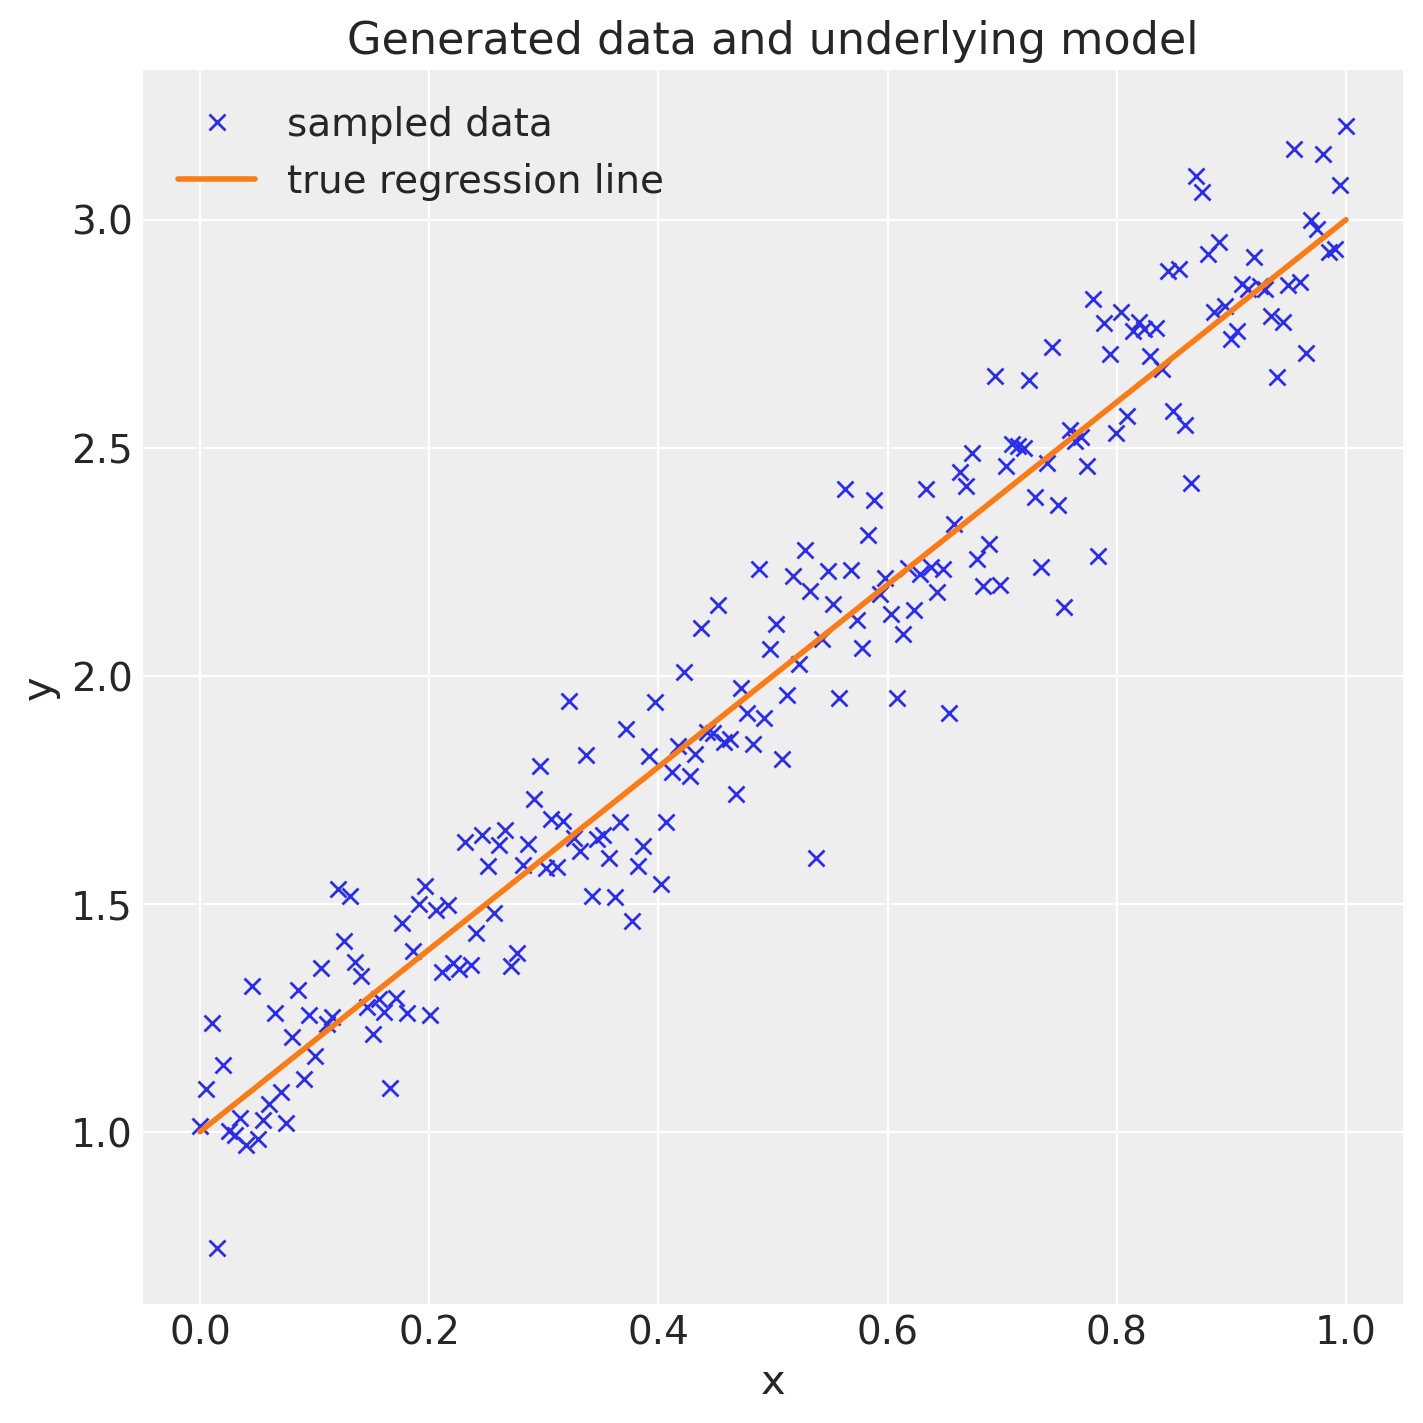

In [2]:
# data size
size = 200

# true line parameter
true_intercept = 1
true_slope = 2

# y = a + b*x
x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x

# add noise (sampled data)
y = true_regression_line + np.random.normal(scale=.15, size=size)

# simulate data 
data = dict(x=x, y=y)

# plot the data
fig = plt.figure(figsize=(7, 7));
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model');
ax.plot(x, y, 'x', label='sampled data');
ax.plot(x, true_regression_line, label='true regression line', lw=2.0);
plt.legend(loc=0);

In [3]:
with pm.Model() as naive_model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    intercept = pm.Normal('Intercept', 0, sigma=20)
    slope = pm.Normal('Slope', 0, sigma=20)
    
    target = intercept + slope * x
    
    # Define likelihood
    sigma = pm.HalfCauchy('sigma', beta=10)
    likelihood = pm.Normal('y', mu=target, sigma=sigma, observed=y)


In [4]:

with naive_model:
    idata = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, Slope, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.


In [5]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1.00,0.02,0.96,1.04,0.0,0.0,3689.32,3866.09,1.0
Slope,2.01,0.03,1.95,2.08,0.0,0.0,3689.04,4023.49,1.0
sigma,0.15,0.01,0.13,0.16,0.0,0.0,4121.89,4118.85,1.0
